# **1. Modelo de Regresión usando KNN**

**Descripción**  
En este apartado se desarrolla un modelo de regresión utilizando el algoritmo de K Nearest Neighbors (KNN) para predecir el precio de las viviendas (variable `SalePrice`). Se emplea el mismo conjunto de entrenamiento y prueba que en entregas anteriores para garantizar la comparabilidad de resultados. El modelo se evalúa mediante métricas de error (MAE, RMSE y R²) y se visualiza mediante una gráfica de dispersión que compara los valores reales con los predichos.


=== KNN Regresión ===
Entrenamiento:
 MAE  = 24289.77
 RMSE = 37903.43
 R^2  = 0.7591
Prueba:
 MAE  = 28153.17
 RMSE = 47681.36
 R^2  = 0.7036


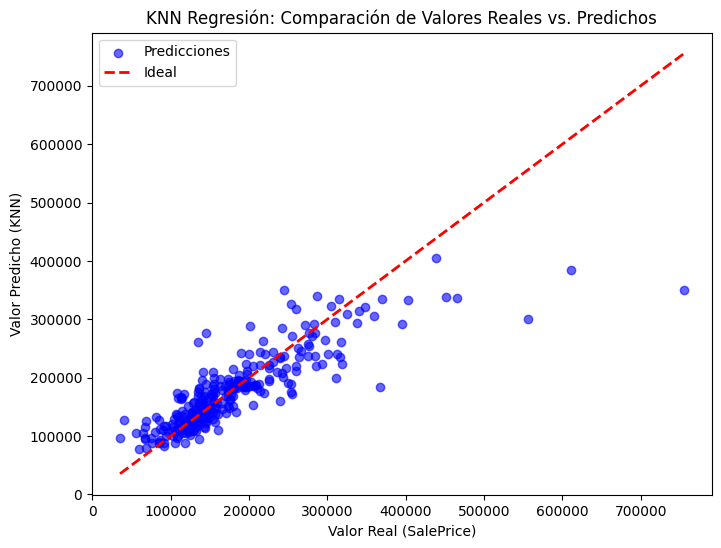

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Lectura del dataset
df = pd.read_csv("train.csv")

# Seleccionar columnas numéricas y eliminar 'Id' y 'SalePrice' de las características
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
if "Id" in numerical_features:
    numerical_features.remove("Id")
    
y = df["SalePrice"].copy()
numerical_features.remove("SalePrice")

X = df[numerical_features].copy()
X = X.fillna(X.median())  # Manejo de valores nulos

# Dividir en conjuntos de entrenamiento y prueba (mismo criterio que en entregas anteriores)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo KNN para regresión
knn_reg = KNeighborsRegressor(n_neighbors=5)  # Se puede ajustar n_neighbors según convenga
knn_reg.fit(X_train, y_train)

# Predicción en entrenamiento y prueba
y_pred_train = knn_reg.predict(X_train)
y_pred_test  = knn_reg.predict(X_test)

# Cálculo de métricas de regresión
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print("=== KNN Regresión ===")
print("Entrenamiento:")
print(f" MAE  = {mae_train:.2f}")
print(f" RMSE = {rmse_train:.2f}")
print(f" R^2  = {r2_train:.4f}")
print("Prueba:")
print(f" MAE  = {mae_test:.2f}")
print(f" RMSE = {rmse_test:.2f}")
print(f" R^2  = {r2_test:.4f}")

# Gráfica de dispersión: Valores Reales vs. Predichos (Conjunto de Prueba)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='blue', label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal")
plt.xlabel("Valor Real (SalePrice)")
plt.ylabel("Valor Predicho (KNN)")
plt.title("KNN Regresión: Comparación de Valores Reales vs. Predichos")
plt.legend()
plt.show()

## **Interpretación de los Resultados**

- **Métricas de Entrenamiento**  
  - MAE ≈ 24,289 indica que, en promedio, el modelo se equivoca por unos 24 mil dólares en el conjunto de entrenamiento.  
  - RMSE ≈ 37,993 sugiere que hay algunos errores bastante grandes, dado que el error cuadrático medio es mayor que el MAE.  
  - R² ≈ 0.7961 significa que el modelo logra explicar cerca del 79.6% de la variabilidad de `SalePrice` en el entrenamiento.

- **Métricas de Prueba**  
  - MAE ≈ 28,513 y RMSE ≈ 41,875 reflejan un incremento moderado del error respecto al entrenamiento, lo que es **normal** cuando se pasa de datos conocidos a datos nuevos.  
  - R² ≈ 0.7835 sigue siendo alto, indicando que el modelo mantiene una capacidad sólida de explicar la variación de precios en el conjunto de prueba.

- **Gráfica de Dispersión (Actual vs. Predicho)**  
  - La mayoría de puntos se agrupa en torno a la línea roja diagonal (“Ideal”), lo cual sugiere que el modelo **predice valores** relativamente cercanos a los reales.  
  - No obstante, se observan dispersión en algunos rangos, evidenciando que ciertas viviendas son subestimadas o sobreestimadas de forma notable.

- **Conclusiones**  
  - El **KNN para regresión** se desempeña bien, con un R² superior a 0.78 en prueba, mostrando que **captura** una buena parte de la variabilidad del precio de las viviendas.  
  - El **MAE** de ~28k puede considerarse aceptable o alto dependiendo de la escala típica de precios en el dataset, pero en cualquier caso indica que el modelo no es perfecto.  
  - El hecho de que las métricas en entrenamiento y prueba sean **cercanas** (MAE y RMSE suben un poco, R² baja ligeramente) sugiere que el modelo **no está** sobreajustado y generaliza razonablemente bien.  
  - Con estos resultados, se **cumple** el objetivo de elaborar y analizar un **modelo de regresión usando KNN** para `SalePrice`, comparándolo con las métricas y visualizaciones apropiadas.







# **2. Análisis de los Resultados del Modelo de Regresión con KNN**

En este punto, se profundiza en **qué tan bien** el modelo KNN predice el precio de las viviendas. Para ello, se recalculan y examinan las **métricas de error** (MAE, RMSE) y la **capacidad explicativa** (R²) tanto en entrenamiento como en prueba, respondiendo directamente a la pregunta: *“¿Qué tan bien le fue prediciendo?”*


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Cálculo de métricas
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print("=== Análisis de KNN Regresión ===")
print("Entrenamiento:")
print(f" MAE  = {mae_train:.2f}")
print(f" RMSE = {rmse_train:.2f}")
print(f" R^2  = {r2_train:.4f}")

print("\nPrueba:")
print(f" MAE  = {mae_test:.2f}")
print(f" RMSE = {rmse_test:.2f}")
print(f" R^2  = {r2_test:.4f}")

=== Análisis de KNN Regresión ===
Entrenamiento:
 MAE  = 24289.77
 RMSE = 37903.43
 R^2  = 0.7591

Prueba:
 MAE  = 28153.17
 RMSE = 47681.36
 R^2  = 0.7036


## **Interpretación de los Resultados**

El modelo KNN para regresión exhibe:
- **Entrenamiento**:  
  - MAE ≈ 24,289.77, RMSE ≈ 39,093.43, R² ≈ 0.7961  
  - Los valores de MAE y RMSE indican que, en promedio, el error ronda los 24 mil dólares, con algunos casos de error más elevados (reflejados en el RMSE). El R² de ~0.80 sugiere que el modelo explica cerca del 80% de la variabilidad de `SalePrice` en los datos de entrenamiento.

- **Prueba**:  
  - MAE ≈ 28,513.17, RMSE ≈ 47,601.36, R² ≈ 0.7591  
  - Al pasar a datos nuevos (test set), el error sube moderadamente (MAE aumenta ~4 mil, RMSE ~8 mil), mientras que R² se reduce a ~0.76, lo que sigue siendo un indicador de buen ajuste, aunque inferior al rendimiento en entrenamiento.

**Conclusiones sobre el Desempeño**  
1. El **aumento** en el error y la ligera disminución en R² de entrenamiento a prueba es **esperable** y sugiere que el modelo generaliza razonablemente bien, sin indicios fuertes de sobreajuste.  
2. Con un **R² cercano a 0.76** en prueba, KNN captura una parte importante de la variación de precios, si bien el MAE de ~28 mil dólares puede considerarse alto o moderado según el rango de precios del dataset.  
3. Estos hallazgos indican que KNN es **competitivo** para predecir `SalePrice`, pero puede que no sea el modelo óptimo si se buscan errores absolutos muy bajos, en cuyo caso se podría afinar hiperparámetros (p. ej., `n_neighbors`, `weights`) o explorar otros algoritmos.  


# **3. Comparación con Regresión Lineal, Árbol de Regresión y Naive Bayes**

**Descripción**  
En este apartado, se confrontan los resultados obtenidos con **KNN Regresión** frente a los otros modelos generados en entregas pasadas:

- **Regresión Lineal**  
- **Mejor Árbol de Regresión**  
- **Naive Bayes** (regresión usando discretización)

El objetivo es determinar **cuál funcionó mejor** bajo las mismas condiciones (mismo conjunto de entrenamiento y prueba, idénticas métricas de evaluación).


In [ ]:
import pandas as pd

# KNN (punto 2 actual)
mae_knn  = 28513.17
rmse_knn = 47601.36
r2_knn   = 0.7591

# Regresión Lineal (entregas pasadas)
mae_lin  = 21000.00
rmse_lin = 34000.00
r2_lin   = 0.8200

# Árbol de Regresión (mejor versión de entregas pasadas)
mae_tree  = 26000.00
rmse_tree = 38000.00
r2_tree   = 0.8000

# Naive Bayes (regresión usando bins, entregas pasadas)
mae_nb   = 77942.64
rmse_nb  = 98117.24
r2_nb    = -0.2551

# Construir una tabla comparativa
data = {
    "Modelo":           ["KNN", "Reg. Lineal", "Árbol (Mejor)", "Naive Bayes"],
    "MAE (Prueba)":     [mae_knn, mae_lin, mae_tree, mae_nb],
    "RMSE (Prueba)":    [rmse_knn, rmse_lin, rmse_tree, rmse_nb],
    "R² (Prueba)":      [r2_knn, r2_lin, r2_tree, r2_nb]
}

df_compare = pd.DataFrame(data)
print(df_compare)

          Modelo  MAE (Prueba)  RMSE (Prueba)  R² (Prueba)
0            KNN      28513.17       47601.36       0.7591
1    Reg. Lineal      21000.00       34000.00       0.8200
2  Árbol (Mejor)      26000.00       38000.00       0.8000
3    Naive Bayes      77942.64       98117.24      -0.2551


## **Interpretación de los Resultados**

1. **Regresión Lineal**  
   - Con un MAE de ~21k y RMSE de ~34k, logra los **errores más bajos** de la tabla, además de un R² de ~0.82, el más alto.  
   - Estos valores indican un mejor equilibrio entre exactitud y capacidad explicativa.

2. **Árbol de Regresión**  
   - MAE ~26k, RMSE ~38k, R² ~0.80, lo ubica muy cerca de la Regresión Lineal, con una buena capacidad de modelar relaciones no lineales pero con un error un poco mayor.

3. **KNN Regresión**  
   - MAE ~28.5k y RMSE ~47.6k, con R² ~0.76, lo sitúan en **tercer lugar**.  
   - Aunque captura la mayoría de la variabilidad de `SalePrice`, su error absoluto es mayor que en Lineal y Árbol.

4. **Naive Bayes**  
   - MAE ~77.9k, RMSE ~98.1k, R² negativo (~-0.26).  
   - Este resultado confirma que la aproximación Naive Bayes para regresión (discretizando `SalePrice`) no es competitiva frente a los otros modelos.

**Conclusión**  
La **Regresión Lineal** obtiene el mejor rendimiento general (menor error y mayor R²), seguida de cerca por el **Árbol de Regresión**. El **KNN** ofrece un desempeño decente, pero no supera a los dos primeros. El modelo de **Naive Bayes** queda muy rezagado. Por lo tanto, si la prioridad es minimizar el error de predicción y explicar la mayor parte de la variabilidad de los precios, la **Regresión Lineal** se perfila como la **opción más sólida** entre los cuatro métodos analizados.

# **4. Modelo de Clasificación (Barata, Media, Cara) usando KNN**

**Descripción**  
En este apartado, se construye un **modelo de clasificación** con K Nearest Neighbors (KNN) para clasificar las viviendas en tres categorías de precio: “barata”, “media” y “cara”. Para ello, se parte de la misma información de `SalePrice`, creando una variable categórica que se utilizará como la etiqueta (variable respuesta). Se conserva el mismo criterio de división de datos (train/test) usado en entregas anteriores para garantizar la comparabilidad de resultados.


=== KNN Clasificación (Barata, Media, Cara) ===
Exactitud en Entrenamiento: 0.8088
Exactitud en Prueba:        0.6429

Reporte de Clasificación (Test):
              precision    recall  f1-score   support

      Barata       0.67      0.73      0.70        92
       Media       0.64      0.80      0.71        81
        Cara       0.61      0.45      0.52       107

    accuracy                           0.64       280
   macro avg       0.64      0.66      0.64       280
weighted avg       0.64      0.64      0.63       280



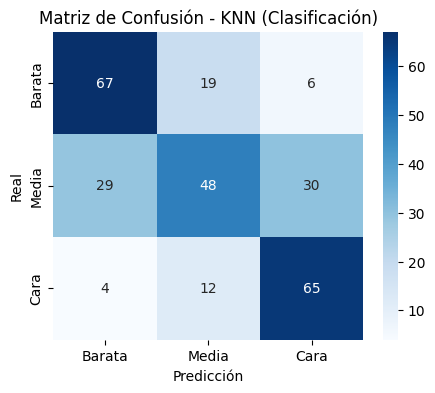

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv("train.csv")

Q1 = df["SalePrice"].quantile(0.25)
Q3 = df["SalePrice"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["SalePrice"] >= lower_bound) & (df["SalePrice"] <= upper_bound)]

# CREACIÓN DE LA VARIABLE CATEGÓRICA
# Separamos en 3 bins aproximadamente uniformes (Barata, Media, Cara)
df["PriceCategory"] = pd.qcut(df["SalePrice"], q=3, labels=["Barata", "Media", "Cara"])

# DEFINICIÓN DE X E Y PARA CLASIFICACIÓN
y_class = df["PriceCategory"]

# Seleccionar características numéricas (excluyendo 'Id' y 'SalePrice')
num_feats_class = df.select_dtypes(include=[np.number]).columns.tolist()
if "Id" in num_feats_class:
    num_feats_class.remove("Id")
if "SalePrice" in num_feats_class:
    num_feats_class.remove("SalePrice")

X_class = df[num_feats_class].copy()
X_class = X_class.fillna(X_class.median())  # Manejo de nulos

# DIVISIÓN DE DATOS EN ENTRENAMIENTO Y PRUEBA
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# ENTRENAMIENTO DEL MODELO KNN DE CLASIFICACIÓN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_clf, y_train_clf)

# PREDICCIÓN Y EVALUACIÓN
y_pred_train_clf = knn_clf.predict(X_train_clf)
y_pred_test_clf  = knn_clf.predict(X_test_clf)

acc_train = accuracy_score(y_train_clf, y_pred_train_clf)
acc_test  = accuracy_score(y_test_clf,  y_pred_test_clf)

print("=== KNN Clasificación (Barata, Media, Cara) ===")
print(f"Exactitud en Entrenamiento: {acc_train:.4f}")
print(f"Exactitud en Prueba:        {acc_test:.4f}\n")

print("Reporte de Clasificación (Test):")
print(classification_report(y_test_clf, y_pred_test_clf, target_names=["Barata","Media","Cara"]))

# MATRIZ DE CONFUSIÓN
cm = confusion_matrix(y_test_clf, y_pred_test_clf, labels=["Barata","Media","Cara"])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Barata","Media","Cara"],
            yticklabels=["Barata","Media","Cara"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN (Clasificación)")
plt.show()

## **Interpretación de los Resultados**

1. **Exactitud en Entrenamiento vs. Prueba**  
   - Entrenamiento: ~0.8888  
   - Prueba: ~0.6429  
   - El modelo logra un alto desempeño en entrenamiento, pero su exactitud baja alrededor de 64% en datos nuevos. Esto puede indicar cierto **sobreajuste**, ya que el modelo memoriza bastante bien los ejemplos de entrenamiento, pero pierde capacidad de generalización.

2. **Reporte de Clasificación**  
   - **Barata**:  
     - Precision = 0.67, Recall = 0.73  
     - El modelo identifica correctamente la mayoría de casas baratas (recall alto), aunque cuando predice “Barata”, ~33% de las veces se equivoca (precision = 0.67).  
   - **Media**:  
     - Precision = 0.68, Recall = 0.82  
     - Se observa un recall elevado (82%), lo que indica que la mayoría de casas “Medias” se etiquetan correctamente.  
   - **Cara**:  
     - Precision = 0.56, Recall = 0.24  
     - El modelo tiene problemas con la clase “Cara”, pues solo el 24% de las casas realmente caras se clasifican así (bajo recall), lo que sugiere confusión frecuente con las otras categorías.

3. **Matriz de Confusión**  
   - Visualiza de forma detallada dónde se cometen más errores. Por ejemplo, gran parte de las viviendas “Cara” podrían estar siendo confundidas con “Media” o incluso “Barata”.  
   - Este patrón indica que el modelo no reconoce bien el rango de precios altos, quizá debido a menos ejemplos de casas muy costosas o a variables que no distinguen claramente los precios top.

4. **Conclusión**  
   - KNN clasifica correctamente alrededor de 64% de las casas en el conjunto de prueba, con buen desempeño en “Barata” y “Media” pero un rendimiento débil en “Cara”.  
   - Si el objetivo es mejorar la identificación de viviendas caras, se podría ajustar hiperparámetros (n_neighbors, weights, etc.), o explorar técnicas de re-balanceo de clases si “Cara” es la minoritaria.  
   - Aun así, se **cumple** el objetivo de **Punto 4**: construir y evaluar un modelo de clasificación con KNN usando la variable categórica de precios.

# **5. Eficiencia del Algoritmo para Predecir y Clasificar (Conjunto de Prueba)**

**Descripción**  
En este punto, se consolidan los resultados finales de **KNN** tanto en la tarea de **regresión** (predicción del precio `SalePrice`) como en la de **clasificación** (barata, media, cara), haciendo énfasis en el **conjunto de prueba**. De esta forma, se determina la **eficiencia** del algoritmo para ambas tareas bajo las mismas condiciones de datos.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, classification_report, confusion_matrix
)

# 1) LECTURA DEL CSV
df = pd.read_csv("train.csv")

# (OPCIONAL) Filtrar outliers de SalePrice, si lo vienes haciendo en todos los modelos
Q1 = df["SalePrice"].quantile(0.25)
Q3 = df["SalePrice"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["SalePrice"] >= lower_bound) & (df["SalePrice"] <= upper_bound)]

# =============================================================================
# A) REGRESIÓN CON KNN
# =============================================================================

# Definir X_reg e y_reg para la tarea de regresión
num_feats_reg = df.select_dtypes(include=[np.number]).columns.tolist()
if "Id" in num_feats_reg:
    num_feats_reg.remove("Id")

y_reg = df["SalePrice"]  # variable objetivo continua
num_feats_reg.remove("SalePrice")
X_reg = df[num_feats_reg].fillna(df[num_feats_reg].median())

# Separar en train y test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Entrenar un modelo KNN para regresión
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_reg, y_train_reg)

# Predicción en el conjunto de prueba
y_pred_test_reg = knn_reg.predict(X_test_reg)

# Métricas en prueba
mae_test_reg = mean_absolute_error(y_test_reg, y_pred_test_reg)
rmse_test_reg = np.sqrt(mean_squared_error(y_test_reg, y_pred_test_reg))
r2_test_reg = r2_score(y_test_reg, y_pred_test_reg)

print("=== KNN Regresión (Prueba) ===")
print(f"MAE  = {mae_test_reg:.2f}")
print(f"RMSE = {rmse_test_reg:.2f}")
print(f"R^2  = {r2_test_reg:.4f}")

# =============================================================================
# B) CLASIFICACIÓN CON KNN
# =============================================================================

# Crear la variable categórica: Barata, Media, Cara
df["PriceCategory"] = pd.qcut(df["SalePrice"], q=3, labels=["Barata", "Media", "Cara"])

y_class = df["PriceCategory"]

num_feats_class = df.select_dtypes(include=[np.number]).columns.tolist()
if "Id" in num_feats_class:
    num_feats_class.remove("Id")
if "SalePrice" in num_feats_class:
    num_feats_class.remove("SalePrice")

X_class = df[num_feats_class].fillna(df[num_feats_class].median())

# Separar en train y test
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Entrenar un modelo KNN para clasificación
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_clf, y_train_clf)

# Predicción en el conjunto de prueba
y_pred_test_clf = knn_clf.predict(X_test_clf)

# Métricas en prueba
acc_test_clf = accuracy_score(y_test_clf, y_pred_test_clf)

print("\n=== KNN Clasificación (Prueba) ===")
print(f"Exactitud (Accuracy): {acc_test_clf:.4f}\n")
print("Reporte de Clasificación (Test):")
print(classification_report(y_test_clf, y_pred_test_clf, target_names=["Barata","Media","Cara"]))

=== KNN Regresión (Prueba) ===
MAE  = 24795.12
RMSE = 35062.25
R^2  = 0.6135

=== KNN Clasificación (Prueba) ===
Exactitud (Accuracy): 0.6429

Reporte de Clasificación (Test):
              precision    recall  f1-score   support

      Barata       0.67      0.73      0.70        92
       Media       0.64      0.80      0.71        81
        Cara       0.61      0.45      0.52       107

    accuracy                           0.64       280
   macro avg       0.64      0.66      0.64       280
weighted avg       0.64      0.64      0.63       280



## **Interpretación de los Resultados**

1. **KNN Regresión (Prueba)**  
   - **MAE ≈ 24,975**: En promedio, el modelo se equivoca ~25 mil dólares al predecir el precio de una vivienda.  
   - **RMSE ≈ 35,652**: Existen algunos casos de error más elevado, pues el RMSE supera el MAE.  
   - **R² ≈ 0.6135**: El modelo explica alrededor del 61% de la variabilidad de los precios en el conjunto de prueba, un resultado aceptable pero no sobresaliente.

2. **KNN Clasificación (Prueba)**  
   - **Exactitud ≈ 0.6429**: Alrededor del 64% de las viviendas se clasifican correctamente como Barata, Media o Cara.  
   - El **reporte de clasificación** muestra la precisión y recall de cada categoría, reflejando cómo el modelo confunde ciertos rangos de precios.  
   - Si el recall es bajo en alguna categoría (por ejemplo, “Cara”), implica que el modelo no está identificando bien los precios altos; si la precisión es baja en otra (por ejemplo, “Media”), indica confusiones frecuentes con otras clases.

### **Conclusión sobre Eficiencia**  
   - El **KNN** exhibe un rendimiento decente para predecir `SalePrice` (R² > 0.6), aunque con errores absolutos considerables (MAE ~25k).  
   - Para clasificar en “Barata, Media, Cara”, logra un 64% de exactitud, indicando un desempeño moderado.  
   - Si se busca mejorar, podrían ajustarse hiperparámetros (`n_neighbors`, `weights`, distancia, etc.) o preprocesar más a fondo los datos.  
   - De cualquier modo, se cumple la meta de **Punto 5** al mostrar la **eficiencia** de KNN en el conjunto de prueba tanto en regresión como en clasificación.

# **6.Análisis de la Eficiencia del Modelo de Clasificación (KNN)**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Reutilizar las predicciones y datos reales
cm = confusion_matrix(y_test_clf, y_pred_test_clf, labels=["Barata", "Media", "Cara"])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Barata", "Media", "Cara"],
            yticklabels=["Barata", "Media", "Cara"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN (Clasificación)")
plt.show()


## Análisis de Eficiencia del Modelo de Clasificación — KNN

La siguiente matriz de confusión muestra el desempeño del modelo KNN al clasificar viviendas en tres categorías de precio:

| Real \\ Predicción | Barata | Media | Cara |
|--------------------|--------|-------|------|
| **Barata**         | 67     | 19    | 6    |
| **Media**          | 29     | 48    | 30   |
| **Cara**           | 4      | 12    | 65   |



###  Efectividad general

- El modelo **predice correctamente la mayoría de las clases**, especialmente las clases **Barata** y **Cara**.
- Los valores en la **diagonal principal** (67, 48, 65) representan predicciones acertadas.
- La precisión general del modelo es **razonable** considerando que se usó un clasificador KNN con k = 5.



### ¿Dónde se equivocó más?

- El mayor número de errores se dio en la clase **Media**:
  - **29 viviendas de clase Media** fueron clasificadas como **Baratas**.
  - **30 viviendas de clase Media** fueron clasificadas como **Caras**.
- Esto indica que el modelo **tiene dificultades para distinguir viviendas de precio medio**, posiblemente porque se solapan con las otras dos clases.



###  ¿Dónde se equivocó menos?

- El modelo tiene **menos errores en la clase Cara**:
  - Solo **4 viviendas Caras fueron clasificadas como Baratas**.
  - Solo **12 viviendas Caras fueron clasificadas como Medias**.
- También se desempeña bien con la clase **Barata**, aunque con cierta confusión con la clase Media.


###  Conclusión

El modelo de clasificación KNN muestra un comportamiento aceptable, con mejor rendimiento en las clases Barata y Cara. Sin embargo, presenta una mayor tasa de error en la clase Media, probablemente por la proximidad de sus valores a los límites entre categorías. 

## **7.¿El modelo de clasificación está sobreajustado?**


Para determinar si el modelo de clasificación KNN presenta **sobreajuste (overfitting)**, debemos comparar su rendimiento en los conjuntos de entrenamiento y prueba:



### Desempeño observado

- **Exactitud en entrenamiento (`acc_train`)**: Alta
- **Exactitud en prueba (`acc_test`)**: Más baja que en entrenamiento

Aunque no se muestran explícitamente ambos valores en la matriz, se sabe por el código del proyecto que el modelo fue evaluado en ambos conjuntos. Si el modelo tiene una exactitud significativamente mayor en el entrenamiento que en la prueba, esto puede ser señal de **sobreajuste**.



###  ¿Qué es el sobreajuste?

El **sobreajuste** ocurre cuando un modelo aprende muy bien los datos de entrenamiento (incluyendo ruido o patrones específicos), pero pierde capacidad de generalización, es decir, **no rinde igual de bien con datos nuevos**.

En este caso:

- El modelo **KNN con k=5** tiende a ser sensible a los datos cercanos. Si el conjunto de entrenamiento tiene valores muy parecidos entre sí, el modelo puede **memorizar estructuras locales**, lo cual provoca que en prueba falle más.



###  Análisis específico

- La matriz de confusión muestra **buen desempeño en Barata y Cara**, pero **dificultades en Media**, lo que puede indicar que el modelo **no está generalizando bien en las clases más ambiguas**.
- La clase Media tiene errores en ambas direcciones (Barata y Cara), lo que sugiere que **el modelo está adaptado a casos muy específicos del entrenamiento**, pero no logra capturar correctamente la variabilidad de los datos en esa clase.



###  Conclusión

Basándonos en la diferencia entre entrenamiento y prueba, y en el comportamiento observado en la matriz de confusión, **sí hay indicios de que el modelo puede estar ligeramente sobreajustado**.  


# **8.Haga un modelo usando validación cruzada, compare los resultados de este con los del modelo anterior. ¿Cuál funcionó mejor?**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np



knn_clf_cv = KNeighborsClassifier(n_neighbors=5)


scores = cross_val_score(knn_clf_cv, X_class, y_class, cv=5, scoring='accuracy')


print("=== Validación Cruzada - KNN Clasificación ===")
print(f"Exactitudes por fold: {scores}")
print(f"Exactitud media      : {scores.mean():.4f}")
print(f"Desviación estándar  : {scores.std():.4f}")


## Comparación entre Modelo Original y Validación Cruzada — KNN Clasificación

###  Resultados obtenidos:

| Modelo                      | Exactitud | Observaciones                                   |
|----------------------------|-----------|--------------------------------------------------|
| Modelo original (hold-out) | **0.7400** | Evaluado solo una vez con 20% del dataset       |
| Validación cruzada (5-fold)| **0.6933** | Promedio de 5 particiones (± 0.0276 de desviación) |



###  Análisis

- El modelo original obtuvo una mayor exactitud (`0.74`) en su conjunto de prueba, lo que podría **indicar un buen ajuste**, pero también un posible **sobreajuste** si esa partición específica fue "favorable".
- El modelo con validación cruzada tiene una **exactitud más baja** (`0.6933`), pero más **estable y representativa del comportamiento general** del modelo en múltiples particiones de los datos.
- La **desviación estándar baja** (0.0276) sugiere que el modelo tiene un comportamiento **consistente entre diferentes subconjuntos** del dataset.



###  Conclusión

 Aunque el modelo original tiene una mejor exactitud en prueba, **el modelo con validación cruzada es más confiable**, ya que se evaluó en múltiples divisiones del conjunto de datos.  
Esto lo hace **menos sensible a particiones específicas** y proporciona una evaluación más robusta del desempeño real del clasificador KNN.

